# Bouncing Ball 

Jypyter NoteBook demonstrates the execution of the **BouncingBall** simulation sample.<br><br>
There are two examples:
* #1 Example - runs the **BouncingBall** FMU project and displays a live TimeSeries chart.<br>
* #2 Example - runs the **BouncingBall** FMU project and draws a chart based on the CSV data after the simulation is complete.<br>

To install the pyST.zip use the following command: <code>$ pip install pyST.zip<code>

To run this NoteBook, follow the provided steps:<br>
**Step 1:** Create a client by providing the TWC server, user name and password. <br>
<code>client = SimulationWebClient('TWC_server', 'user_name', 'user_psw', verifySSL=False)</code><br>
<i>Note: If 'user_psw' is not entered, an input field is provided to enter a password.</i>

In [ ]:
# Disable SSL warnings
import urllib3
import json
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [ ]:
# Create client
from pyST import SimulationWebClient

client = SimulationWebClient('<enter TWC server>', '<enter user name>', verifySSL=False)

**Step 2:** Add the **BouncingBall** simulation project to the TWC server.<br>

### #1 Example
**Step 3:** Run the **BouncingBall** project.<br>

<i>Note:<br> 
If **auto_start=True**, performs the initialization phase and then starts the simulation.<br>
If **auto_start=False**, only the initialization phase of the simulation is performed. The simulation then waits for an invocation to start the simulation, do a step, or terminate the simulation.

In [ ]:
# Run simulation

result = client.run('BouncingBall', config='Run BouncingBall', auto_start=False)
simID = result['simulationId']

**Step 4**: Check the simulation status.<br>
**Step 5**: Click on the **UI** URL to open the live TimeSeries chart.<br>
**Step 6**: Click the **Start** button on the Control Panel to start **BouncingBall** simulation.

In [ ]:
# Get the status of the specified simulation 

client.get_status(simID)

### #2 Example
**Step 7:** Run the following cells.<br><br>
<i>Note: **Simulate()** starts a simulation and returns its results.</i><br>
<code>simulate('project', config='config', version='version', branch='branch', element_id='element_id', commit_results='True/False', verification='All/None/Fail', data=json.dumps('param'))</code>

In [10]:
# Run simulation
result = client.simulate('BouncingBall', config='Run BouncingBall')
csv = result['csvExports']['Bouncing Ball']

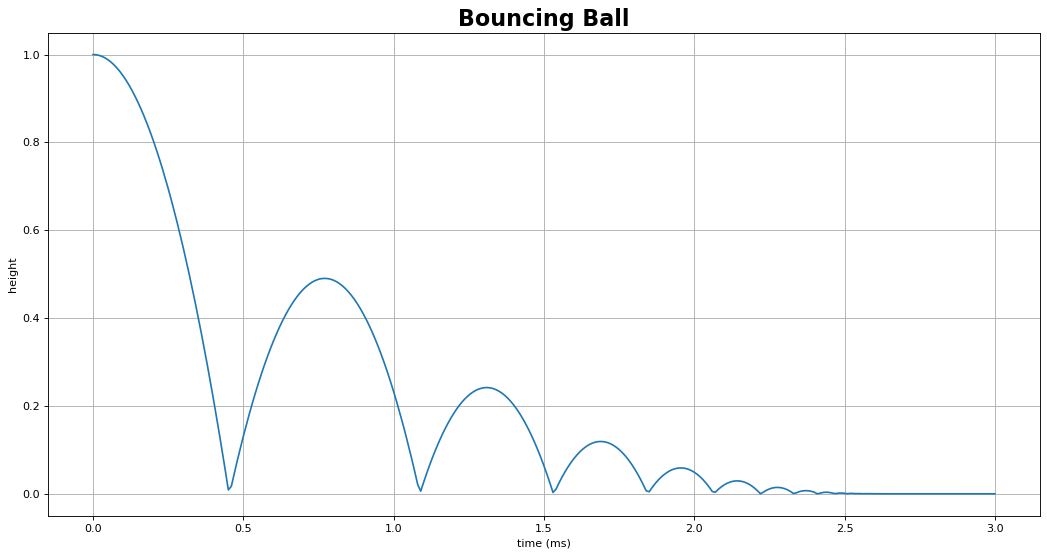

In [11]:
# Draw a chart based on CSV data

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from io import StringIO

figure(figsize=(16, 8), dpi=80)
x = np.loadtxt(StringIO(csv), dtype='double', delimiter=',', skiprows = 1, usecols = (0)) / 1000
y = np.loadtxt(StringIO(csv), dtype='double', delimiter=',', skiprows = 1, usecols = (1))
plt.xlabel('time (ms)')
plt.ylabel('height')
plt.title('Bouncing Ball', fontweight="bold", fontsize=20)
plt.plot(x, y,)
plt.grid()
plt.show()